In [40]:
from ba_optimization import BeesFitTSK
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [41]:
expressions = {"P":"Precipitation", "E":"Potential evapotranspiration", "PB":"Precipation balance", "Tave":"Tave"}
selected_features = ["Relative_yield_change", "Tave", "Tmax", "Tmin"]
train_data = pd.read_csv("dataset/matlab_1_train.csv")[selected_features]
test_data = pd.read_csv("dataset/matlab_1_test.csv")[selected_features]
training_model:BeesFitTSK = BeesFitTSK(5, 4, 1, 20, 200, 1, 1000, train_data, test_data)
training_model.initialize_population(3, 3, trap_quantile=0.3)

for i in range (100):
    training_model.main_loop()
    

Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
Current best fitness: 6.47
C

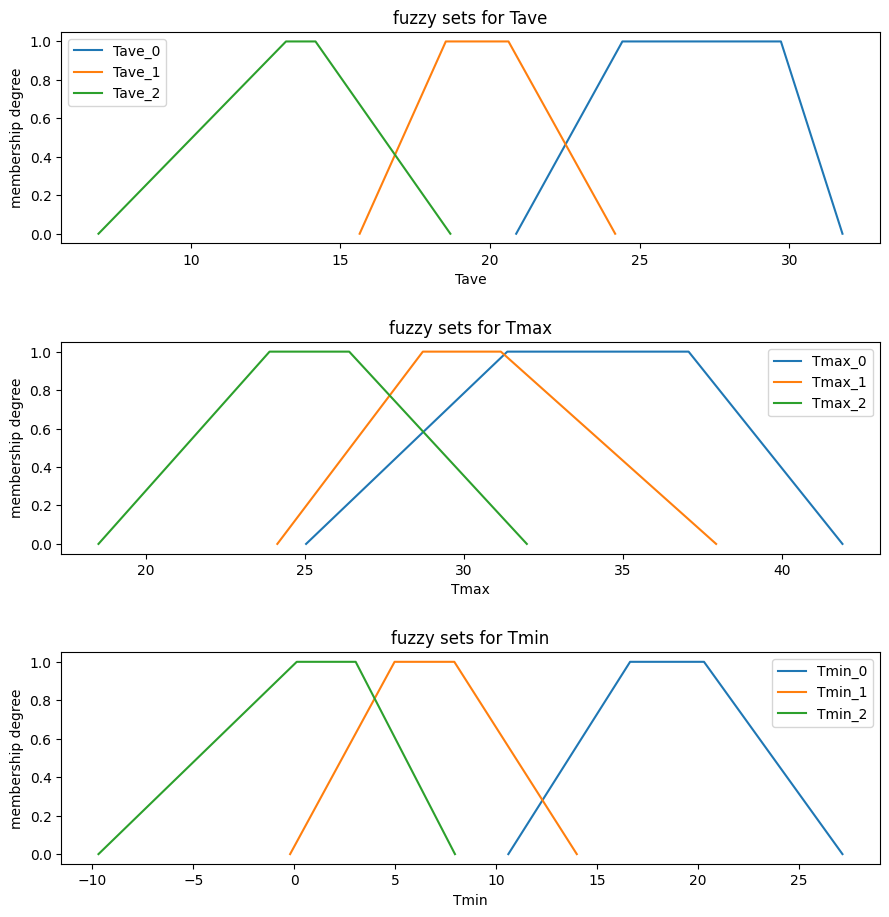

In [42]:
training_model.all_time_best_model.show_fuzzy_sets()

In [43]:
training_model.all_time_best_model.rulebase.print_rulebase(training_model.all_time_best_model._feature_fuzzy_sets)

IF x0 in Tave_0 and x1 in Tmax_0 and x2 in Tmin_0 THEN y = x0 * 0.0303 + x1 * -0.0060 + x2 * -0.0061 + -0.4953
IF x0 in Tave_1 and x1 in Tmax_1 and x2 in Tmin_1 THEN y = x0 * 0.0283 + x1 * 0.0134 + x2 * -0.0173 + -0.9022
IF x0 in Tave_2 and x1 in Tmax_2 and x2 in Tmin_2 THEN y = x0 * 0.0040 + x1 * -0.0074 + x2 * 0.0003 + 0.0648


In [44]:
training_model.all_time_best_model.extracted_params

array([ 3.02812050e-02, -6.01585173e-03, -6.05474590e-03, -4.95264445e-01,
        2.83490213e-02,  1.33813035e-02, -1.72807273e-02, -9.02212465e-01,
        4.03053093e-03, -7.43680702e-03,  2.94058910e-04,  6.47557502e-02])

In [45]:
training_model.all_time_best_model.r2_scores

0.08414606479388087

The measured error is not good, indicating that the model underfits and there could be some bug in the code.

In [46]:
test_series = pd.Series(abs(train_data.iloc[:, 0].to_numpy() - training_model.all_time_best_model.test_actuals))

In [47]:
test_series[test_series > 0.6]

153    0.659252
176    0.736082
193    0.614735
351    0.615178
490    0.674655
509    0.635600
522    0.609277
605    0.713178
631    0.629955
632    0.626818
689    0.702449
706    0.602881
787    0.600600
845    0.611758
914    0.670276
924    0.645101
979    0.611545
dtype: float64

In [48]:
training_model.all_time_best_model.test_actuals[605]

-0.053178155181729525

In [49]:
train_data.iloc[605,:]

Relative_yield_change     0.66000
Tave                     24.13333
Tmax                     34.95042
Tmin                     12.99181
Name: 605, dtype: float64

Trying with a simple aproximation

In [50]:
def benchmark_funciton(x):
    if x < 10:
        return 5.0
    if x < 20:
        return x*0.5
    if x < 30:
        return 10.0
    if x < 50:
        return 17.44 + x*-0.25
    return 5

In [51]:
test_x = np.linspace(0, 60, 100)

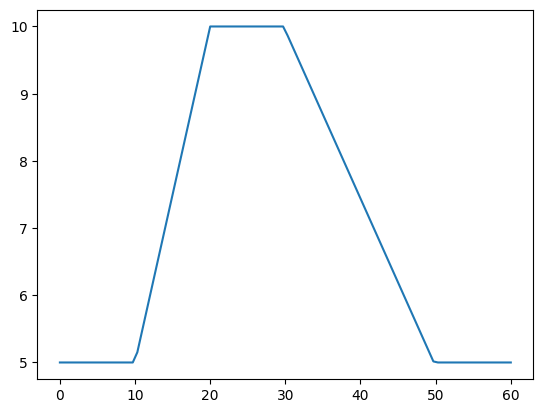

In [52]:
vec_func = np.vectorize(benchmark_funciton)
cur_y = vec_func(test_x)
plt.plot(test_x, cur_y)

In [53]:
train_x = np.random.choice(np.linspace(0, 60, 1000), 1000, replace=True)

In [54]:
train_y = vec_func(train_x)

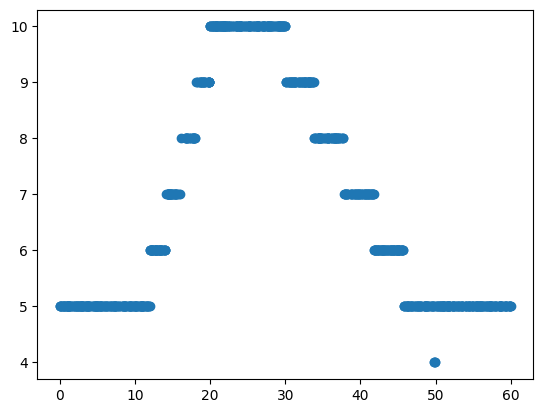

In [55]:
plt.scatter(train_x, train_y)

In [56]:
train_df = pd.DataFrame({"X" : train_x, "Y" : train_y})

In [57]:
training_model2:BeesFitTSK = BeesFitTSK(7, 5, 2, 20, 10, 1, 100, train_df, train_df)
training_model2.initialize_population(4, 4)

for i in range (10):
    training_model2.main_loop()

Current best fitness: 542.47
Current best fitness: 542.47
Current best fitness: 542.47
Current best fitness: 542.47
Current best fitness: 542.47
Current best fitness: 542.47
Current best fitness: 542.47
Current best fitness: 542.47
Current best fitness: 542.47
Current best fitness: 542.47


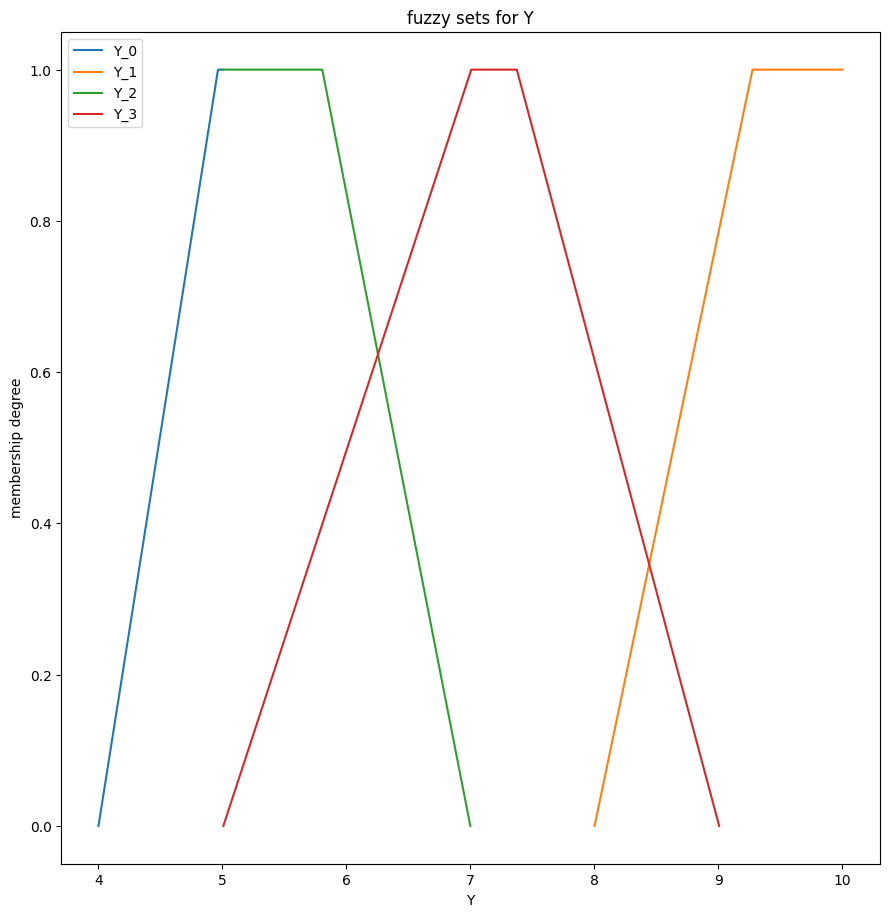

In [58]:
training_model2.all_time_best_model.show_fuzzy_sets()

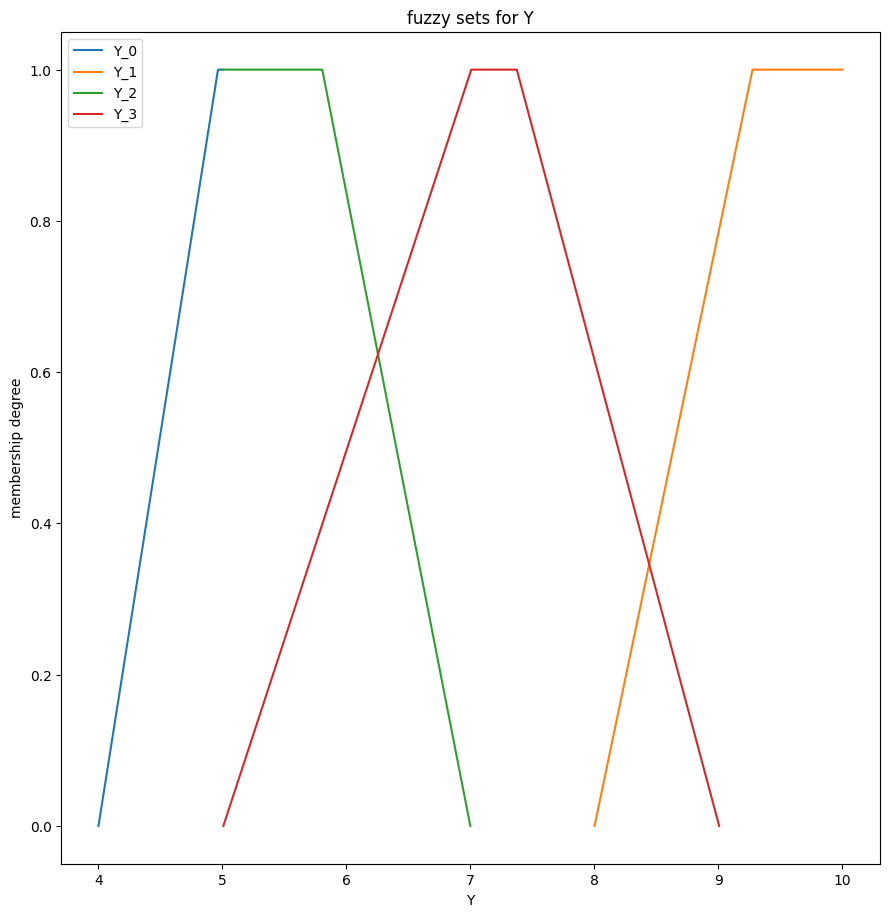

In [59]:
first = training_model2.all_time_best_model.show_fuzzy_sets()

In [60]:
first.a

AttributeError: 'NoneType' object has no attribute 'a'

In [ ]:
first.b

9.171897915200613

In [ ]:
first.c

10.091440133591977

In [ ]:
first.d

10.0

In [ ]:
test = np.random.normal(20, 10, 100000)

In [ ]:
pd.Series(test).quantile(0.5)

20.097688020396834

In [ ]:
(pd.Series(test) < pd.Series(test).quantile(0.5)).value_counts()

False    99998
True         2
Name: count, dtype: int64

In [ ]:
pd.Series(test).std() 

10.767973290130524

In [ ]:
class test:
    def __init__(self, tst):
        self.test = tst

test_list = [test(2), test(4), test(1),test(6), test(0)]
test_list = sorted(test_list, key=lambda x: x.test)
print([x.test for x in test_list])

[0, 1, 2, 4, 6]


In [ ]:
test_array = np.array([1,5,4,3,5,6,4,3,2,34,5])

In [ ]:
quant = pd.Series(test_array).quantile(0.95)
mean = pd.Series(test_array).mean()

In [ ]:
increment = abs(mean-quant)

In [ ]:
mean-increment

-6.909090909090907